In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import string
# !pip install pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
from collections import Counter
from textblob import TextBlob
# !pip install contractions
import contractions
from autocorrect import spell
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.plotly as py
import matplotlib.pyplot as plt

plt.xticks(rotation=70)
%matplotlib inline

In [2]:
import os
import glob
import pandas as pd
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
dataframes=[]
df=pd.DataFrame()

directoryPath=os.getcwd()
for file_name in glob.glob(directoryPath+'\*.csv'):
    if "reddit_Clean.csv" in file_name:
        continue
    x = pd.read_csv(file_name)
    x['flare']=file_name.split("\\")[-1].split(".")[0]
    x = x.loc[:, ~x.columns.str.contains('^Unnamed')]
    dataframes.append(x)
    df = pd.concat([df,x],axis=0)

<>:5: DeprecationWarning:

invalid escape sequence \*

<>:5: DeprecationWarning:

invalid escape sequence \*

<>:5: DeprecationWarning:

invalid escape sequence \*

<ipython-input-3-d28381a5cdce>:5: DeprecationWarning:

invalid escape sequence \*



In [4]:
df.head()

,questions,comments,explanation,flare
0,How much money should an average Indian youth ...,"[""10-15k, nowadays about 17k that's where most...",I am an average Indian youth. I got an entry l...,AskIndia
1,Need help regarding my career. Specifically MBA.,['Indian MBA lays a lot of emphasis on acads a...,"Tldr; Appeared for CAT(98.3) this year, gettin...",AskIndia
2,Why is Mobile premiere league (MPL) legal in i...,"[""There are two types of games - Games of Skil...",As far as I understand you can buy coins with ...,AskIndia
3,"Stray cat in trouble, need advice","[""Lure the cat into a cage/cardboard box if yo...",A stray cat (~1 year old) lives in my apartmen...,AskIndia
4,ExpressVPN Hotstar issue,"['Me: reads titles thinks ""oh just root your ...","Hi all,I am new to express vpn and reddit. I h...",AskIndia


In [5]:
df.shape

(2734, 4)

In [6]:
df.flare.value_counts()

Scheduled                 250
Coronavirus               250
AskIndia                  249
NonPolitical              249
Politics                  248
Policy_Economy            248
Business_and_Finance      247
Science_and_Technology    245
Food                      243
Photography               242
Sports                    220
CAA-NRC-NPR                43
Name: flare, dtype: int64

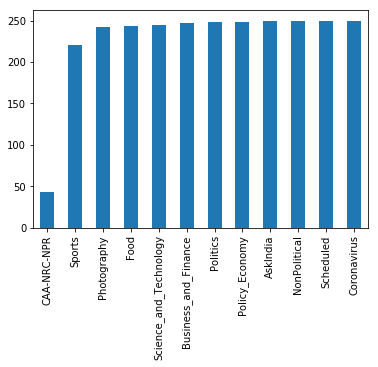

In [7]:
import matplotlib.pyplot as plt
df.flare.value_counts().sort_values().plot(kind = 'bar')

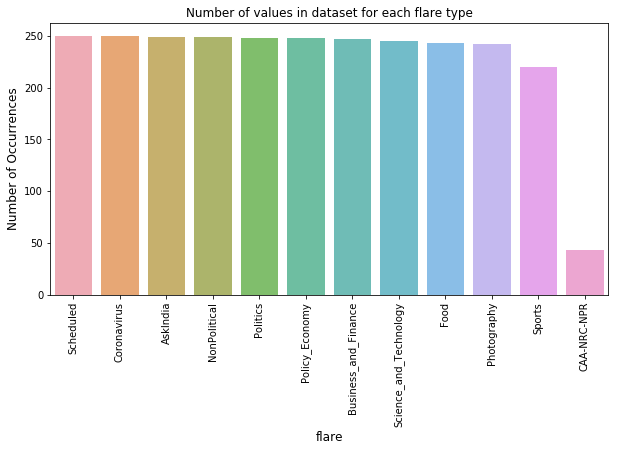

In [8]:
import seaborn as sns
flare_count  = df['flare'].value_counts()
falre_count = flare_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(flare_count.index, flare_count.values, alpha=0.8)
plt.title('Number of values in dataset for each flare type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('flare', fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [9]:
# plt.title('Percentage of falres', fontsize=20)
# df.flare.value_counts().plot(kind='pie', labels=list(df.flare.unique()),
#                               wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
#                               textprops={'fontsize': 15})

In [10]:
import re
def preprocess(text):

    text = text.replace("(<br/>)", "")
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ') 
    
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text=re.sub(r'\b\w{1,2}\b', '', text)
    text=text.lower().replace("indian","india")
    return ' '.join(text.split()).replace(r"\s*\([^()]*\)","").strip()

In [11]:

preprocess(df.questions.values[0])

'how much money should average india youth spend smartphone'

In [12]:
df.columns

Index(['questions', 'comments', 'explanation', 'flare'], dtype='object')

In [13]:
df.explanation=df.explanation.astype(str)
df.explanation=df.explanation.replace(to_replace=["0"],value=' ')
dfcomments=df.comments.astype(str)
df.comments=df.comments.replace(to_replace=["[]"],value=' ')
# df['questions'] = df.questions.apply(preprocess)

# df['explanation'] = df.explanation.apply(preprocess)

In [14]:
df

,questions,comments,explanation,flare
0,How much money should an average Indian youth ...,"[""10-15k, nowadays about 17k that's where most...",I am an average Indian youth. I got an entry l...,AskIndia
1,Need help regarding my career. Specifically MBA.,['Indian MBA lays a lot of emphasis on acads a...,"Tldr; Appeared for CAT(98.3) this year, gettin...",AskIndia
2,Why is Mobile premiere league (MPL) legal in i...,"[""There are two types of games - Games of Skil...",As far as I understand you can buy coins with ...,AskIndia
3,"Stray cat in trouble, need advice","[""Lure the cat into a cage/cardboard box if yo...",A stray cat (~1 year old) lives in my apartmen...,AskIndia
4,ExpressVPN Hotstar issue,"['Me: reads titles thinks ""oh just root your ...","Hi all,I am new to express vpn and reddit. I h...",AskIndia
5,Did you have trouble claiming your medical ins...,"['If your insurance is through employer, then ...",Just wanting to know how easy or difficult it ...,AskIndia
6,I'm looking for a helmet similar to Shark Vanc...,"[""Vega offroad has these kinds of helmets alth...","Hey guys, any riders out here? I'm looking for...",AskIndia
7,What is the solution to the migrant labourer i...,"[""Vote wisely.Indians are getting what they vo...",Did the government not think about them at all...,AskIndia
8,"[Request] Long shot in the dark, but I am look...",['Zee5 streaming subscription might have archi...,"Yeah, I know that chances of finding it are al...",AskIndia
9,How much yelling is normal for Indians? Is it ...,['While I agree with what other comments are s...,"My Norwegian boyfriend says I yell too much, a...",AskIndia


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 219
Data columns (total 4 columns):
questions      2734 non-null object
comments       2734 non-null object
explanation    2734 non-null object
flare          2734 non-null object
dtypes: object(4)
memory usage: 106.8+ KB


In [16]:
from ast import literal_eval

In [17]:
literal_eval(df.comments.values[0])

["10-15k, nowadays about 17k that's where most midrange smartphones are.",
 "Not more than 12-15k. Nowadays, there isn't much difference beyond those price points.",
 'How long are you planning to keep the new phone?',
 'definitely more than 2 years. My current phone in almost 3 years old.',
 "If you don't game or have two dozen, battery drainer social apps on your phone then any budget phone with good after sales support will do. Smartphones have ridiculous deprecation value, the moment you've got the invoice in your name, you'll be losing money worth 20% of the cost. If you can then wait till one of the 'big day' sales on Amazon or Flipkart, phones will get even cheaper.",
 "correct. I do not game on my phone. I need a good display, large battery and a decent camera. Samsung M31 at 16k is almost perfect for me, except the cheap scratch prone plastic back. I'll wait for some big billion day or prime day sale.",
 "It all depends on which ecosystem your prefer and what you wish to achie

In [29]:
cleaned_comments=[]
cleaned_comments_single=[]
for i in df.comments:
    if i==" ":
        cleaned_comments.append(" ")
        cleaned_comments_single.append(" ")
        continue
        
    l=literal_eval(i.strip())
#     l1=list(map(preprocess, l))
    cleaned_comments.append(l)
    cleaned_comments_single.append(" ".join(l))
    
df['cleaned_comments']=cleaned_comments
df['cleaned_comments_single']=cleaned_comments_single

In [30]:
# cleaned_comments_single

In [31]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [32]:
def word_cloud_generator(text):
    stopwords = set(STOPWORDS) 
   

    wordcloud = WordCloud(width = 800, height = 800, 
                
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

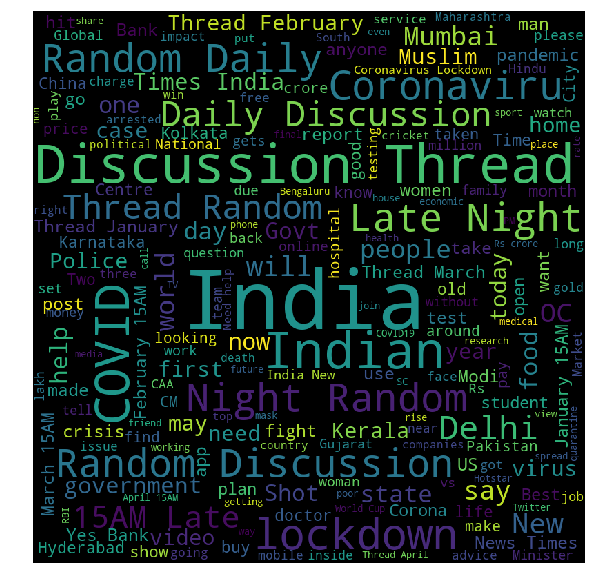

In [33]:
word_cloud_generator(' '.join(df.questions))

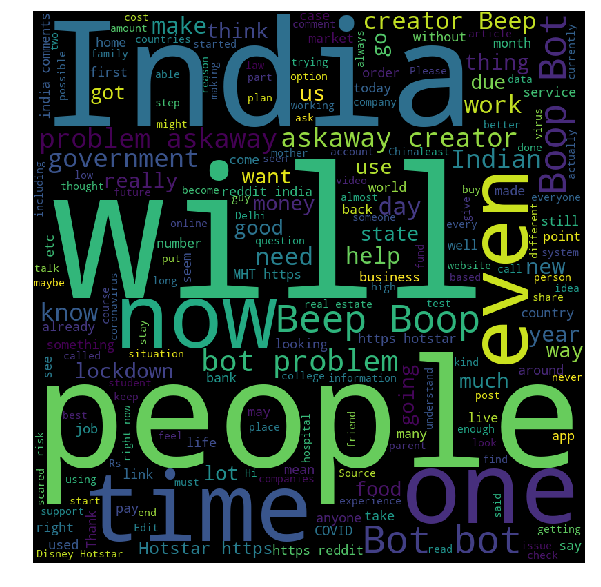

In [34]:
df.explanation=df.explanation.astype(str)
word_cloud_generator(' '.join(df.explanation))

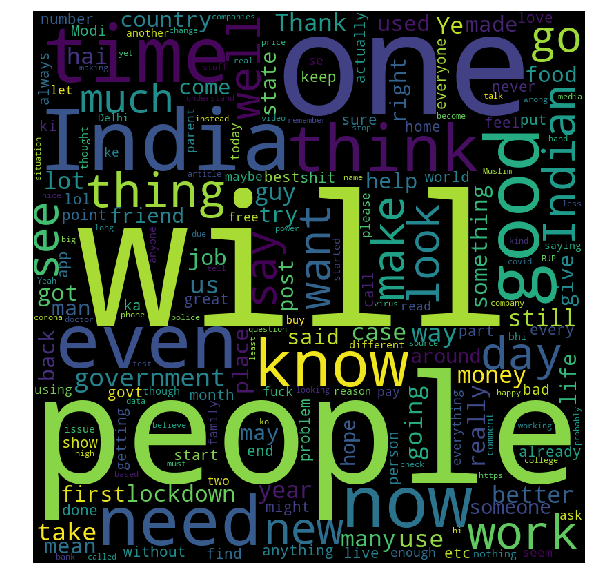

In [35]:
word_cloud_generator(' '.join(df.cleaned_comments_single))

In [36]:
df['no_contract_questions'] = df['questions'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [45]:
contractions.fix("there's")

'there is'

In [46]:
df['no_contract_explanation'] = df['explanation'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['no_contract_comments'] = df['cleaned_comments_single'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [47]:
df['questions_list'] = [' '.join(map(str, l)) for l in df['no_contract_questions']]
df['explanation_list'] = [' '.join(map(str, l)) for l in df['no_contract_explanation']]
df['comments_list'] = [' '.join(map(str, l)) for l in df['no_contract_comments']]

In [39]:
df.head()

,questions,comments,explanation,flare,cleaned_comments,cleaned_comments_single,no_contract_questions,no_contract_explanation,no_contract_comments,questions_list,explanation_list,comments_list
0,How much money should an average Indian youth ...,"[""10-15k, nowadays about 17k that's where most...",I am an average Indian youth. I got an entry l...,AskIndia,"[10-15k, nowadays about 17k that's where most ...","10-15k, nowadays about 17k that's where most m...","[How, much, money, should, an, average, Indian...","[I, am, an, average, Indian, youth., I, got, a...","[10-15k,, nowadays, about, 17k, that is, where...",How much money should an average Indian youth ...,I am an average Indian youth. I got an entry l...,"10-15k, nowadays about 17k that is where most ..."
1,Need help regarding my career. Specifically MBA.,['Indian MBA lays a lot of emphasis on acads a...,"Tldr; Appeared for CAT(98.3) this year, gettin...",AskIndia,[Indian MBA lays a lot of emphasis on acads an...,Indian MBA lays a lot of emphasis on acads and...,"[Need, help, regarding, my, career., Specifica...","[Tldr;, Appeared, for, CAT(98.3), this, year,,...","[Indian, MBA, lays, a, lot, of, emphasis, on, ...",Need help regarding my career. Specifically MBA.,"Tldr; Appeared for CAT(98.3) this year, gettin...",Indian MBA lays a lot of emphasis on acads and...
2,Why is Mobile premiere league (MPL) legal in i...,"[""There are two types of games - Games of Skil...",As far as I understand you can buy coins with ...,AskIndia,[There are two types of games - Games of Skill...,There are two types of games - Games of Skill ...,"[Why, is, Mobile, premiere, league, (MPL), leg...","[As, far, as, I, understand, you, can, buy, co...","[There, are, two, types, of, games, -, Games, ...",Why is Mobile premiere league (MPL) legal in i...,As far as I understand you can buy coins with ...,There are two types of games - Games of Skill ...
3,"Stray cat in trouble, need advice","[""Lure the cat into a cage/cardboard box if yo...",A stray cat (~1 year old) lives in my apartmen...,AskIndia,[Lure the cat into a cage/cardboard box if you...,Lure the cat into a cage/cardboard box if you ...,"[Stray, cat, in, trouble,, need, advice]","[A, stray, cat, (~1, year, old), lives, in, my...","[Lure, the, cat, into, a, cage/cardboard, box,...","Stray cat in trouble, need advice",A stray cat (~1 year old) lives in my apartmen...,Lure the cat into a cage/cardboard box if you ...
4,ExpressVPN Hotstar issue,"['Me: reads titles thinks ""oh just root your ...","Hi all,I am new to express vpn and reddit. I h...",AskIndia,"[Me: reads titles thinks ""oh just root your p...","Me: reads titles thinks ""oh just root your ph...","[ExpressVPN, Hotstar, issue]","[Hi, all,I, am, new, to, express, vpn, and, re...","[Me:, reads, titles, thinks, ""oh, just, root, ...",ExpressVPN Hotstar issue,"Hi all,I am new to express vpn and reddit. I h...","Me: reads titles thinks ""oh just root your pho..."


In [487]:
df['lower_questions'] = df['questions_list'].apply(word_tokenize).apply(lambda x: [word.lower() for word in x])
df['lower_explanation'] = df['explanation_list'].apply(word_tokenize).apply(lambda x: [word.lower() for word in x])
df['lower_comments'] = df['comments_list'].apply(word_tokenize).apply(lambda x: [word.lower() for word in x])


In [40]:
df.head()

,questions,comments,explanation,flare,cleaned_comments,cleaned_comments_single,no_contract_questions,no_contract_explanation,no_contract_comments,questions_list,explanation_list,comments_list
0,How much money should an average Indian youth ...,"[""10-15k, nowadays about 17k that's where most...",I am an average Indian youth. I got an entry l...,AskIndia,"[10-15k, nowadays about 17k that's where most ...","10-15k, nowadays about 17k that's where most m...","[How, much, money, should, an, average, Indian...","[I, am, an, average, Indian, youth., I, got, a...","[10-15k,, nowadays, about, 17k, that is, where...",How much money should an average Indian youth ...,I am an average Indian youth. I got an entry l...,"10-15k, nowadays about 17k that is where most ..."
1,Need help regarding my career. Specifically MBA.,['Indian MBA lays a lot of emphasis on acads a...,"Tldr; Appeared for CAT(98.3) this year, gettin...",AskIndia,[Indian MBA lays a lot of emphasis on acads an...,Indian MBA lays a lot of emphasis on acads and...,"[Need, help, regarding, my, career., Specifica...","[Tldr;, Appeared, for, CAT(98.3), this, year,,...","[Indian, MBA, lays, a, lot, of, emphasis, on, ...",Need help regarding my career. Specifically MBA.,"Tldr; Appeared for CAT(98.3) this year, gettin...",Indian MBA lays a lot of emphasis on acads and...
2,Why is Mobile premiere league (MPL) legal in i...,"[""There are two types of games - Games of Skil...",As far as I understand you can buy coins with ...,AskIndia,[There are two types of games - Games of Skill...,There are two types of games - Games of Skill ...,"[Why, is, Mobile, premiere, league, (MPL), leg...","[As, far, as, I, understand, you, can, buy, co...","[There, are, two, types, of, games, -, Games, ...",Why is Mobile premiere league (MPL) legal in i...,As far as I understand you can buy coins with ...,There are two types of games - Games of Skill ...
3,"Stray cat in trouble, need advice","[""Lure the cat into a cage/cardboard box if yo...",A stray cat (~1 year old) lives in my apartmen...,AskIndia,[Lure the cat into a cage/cardboard box if you...,Lure the cat into a cage/cardboard box if you ...,"[Stray, cat, in, trouble,, need, advice]","[A, stray, cat, (~1, year, old), lives, in, my...","[Lure, the, cat, into, a, cage/cardboard, box,...","Stray cat in trouble, need advice",A stray cat (~1 year old) lives in my apartmen...,Lure the cat into a cage/cardboard box if you ...
4,ExpressVPN Hotstar issue,"['Me: reads titles thinks ""oh just root your ...","Hi all,I am new to express vpn and reddit. I h...",AskIndia,"[Me: reads titles thinks ""oh just root your p...","Me: reads titles thinks ""oh just root your ph...","[ExpressVPN, Hotstar, issue]","[Hi, all,I, am, new, to, express, vpn, and, re...","[Me:, reads, titles, thinks, ""oh, just, root, ...",ExpressVPN Hotstar issue,"Hi all,I am new to express vpn and reddit. I h...","Me: reads titles thinks ""oh just root your pho..."


In [489]:
punc = string.punctuation
stopwords = set(STOPWORDS) 
df['stopwords_removed_questions'] = df['lower_questions'].apply(lambda x: [word for word in x if word not in punc]).apply(lambda x: [word for word in x if word not in stopwords])
df['stopwords_removed_explanation'] = df['lower_explanation'].apply(lambda x: [word for word in x if word not in punc]).apply(lambda x: [word for word in x if word not in stopwords])
df['stopwords_removed_comments'] = df['lower_comments'].apply(lambda x: [word for word in x if word not in punc]).apply(lambda x: [word for word in x if word not in stopwords])

In [490]:
df.head()

,questions,comments,explanation,flare,cleaned_comments,cleaned_comments_single,no_contract_questions,no_contract_explanation,no_contract_comments,questions_list,explanation_list,comments_list,lower_questions,lower_explanation,lower_comments,stopwords_removed_questions,stopwords_removed_explanation,stopwords_removed_comments
0,how much money should average india youth spen...,"[""10-15k, nowadays about 17k that's where most...",average india youth got entry level job softwa...,AskIndia,[15k nowadays about 17k that where most midran...,15k nowadays about 17k that where most midrang...,"[how, much, money, should, average, india, you...","[average, india, youth, got, entry, level, job...","[15k, nowadays, about, 17k, that, where, most,...",how much money should average india youth spen...,average india youth got entry level job softwa...,15k nowadays about 17k that where most midrang...,"[how, much, money, should, average, india, you...","[average, india, youth, got, entry, level, job...","[15k, nowadays, about, 17k, that, where, most,...","[much, money, average, india, youth, spend, sm...","[average, india, youth, got, entry, level, job...","[15k, nowadays, 17k, midrange, smartphones, 15..."
1,need help regarding career specifically mba,['Indian MBA lays a lot of emphasis on acads a...,tldr appeared for cat this year getting reject...,AskIndia,[india mba lays lot emphasis acads and even du...,india mba lays lot emphasis acads and even dur...,"[need, help, regarding, career, specifically, ...","[tldr, appeared, for, cat, this, year, getting...","[india, mba, lays, lot, emphasis, acads, and, ...",need help regarding career specifically mba,tldr appeared for cat this year getting reject...,india mba lays lot emphasis acads and even dur...,"[need, help, regarding, career, specifically, ...","[tldr, appeared, for, cat, this, year, getting...","[india, mba, lays, lot, emphasis, acads, and, ...","[need, help, regarding, career, specifically, ...","[tldr, appeared, cat, year, getting, rejected,...","[india, mba, lays, lot, emphasis, acads, even,..."
2,why mobile premiere league mpl legal india,"[""There are two types of games - Games of Skil...",far understand you can buy coins with real mon...,AskIndia,[there are two types games games skill and gam...,there are two types games games skill and game...,"[why, mobile, premiere, league, mpl, legal, in...","[far, understand, you, can, buy, coins, with, ...","[there, are, two, types, games, games, skill, ...",why mobile premiere league mpl legal india,far understand you can buy coins with real mon...,there are two types games games skill and game...,"[why, mobile, premiere, league, mpl, legal, in...","[far, understand, you, can, buy, coins, with, ...","[there, are, two, types, games, games, skill, ...","[mobile, premiere, league, mpl, legal, india]","[far, understand, buy, coins, real, money, try...","[two, types, games, games, skill, games, chanc..."
3,stray cat trouble need advice,"[""Lure the cat into a cage/cardboard box if yo...",stray cat year old lives apartment building de...,AskIndia,[lure the cat into cage cardboard box you have...,lure the cat into cage cardboard box you have ...,"[stray, cat, trouble, need, advice]","[stray, cat, year, old, lives, apartment, buil...","[lure, the, cat, into, cage, cardboard, box, y...",stray cat trouble need advice,stray cat year old lives apartment building de...,lure the cat into cage cardboard box you have ...,"[stray, cat, trouble, need, advice]","[stray, cat, year, old, lives, apartment, buil...","[lure, the, cat, into, cage, cardboard, box, y...","[stray, cat, trouble, need, advice]","[stray, cat, year, old, lives, apartment, buil...","[lure, cat, cage, cardboard, box, one, put, to..."
4,expressvpn hotstar issue,"['Me: reads titles thinks ""oh just root your ...",all new express vpn and reddit have question w...,AskIndia,[reads titles thinks just root your phone read...,reads titles thinks just root your phone reads...,"[expressvpn, hotstar, 

In [491]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [492]:
wnl = WordNetLemmatizer()
df['lematized_questions']=df['stopwords_removed_questions'].apply(nltk.tag.pos_tag).apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x]).apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df['lematized_explanation']=df['stopwords_removed_explanation'].apply(nltk.tag.pos_tag).apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x]).apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df['lematized_comments']=df['stopwords_removed_comments'].apply(nltk.tag.pos_tag).apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x]).apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

In [493]:
# Calculate the sentiment polarity 
# since textblob requires us to pass a string into its sentiment function 
# we need to convert the list in the lemmatized column into a string
df['list_lemma_questions'] = [' '.join(map(str, l)) for l in df['lematized_questions']]
df['list_lemma_explanation'] = [' '.join(map(str, l)) for l in df['lematized_explanation']]
df['list_lemma_comments'] = [' '.join(map(str, l)) for l in df['lematized_comments']]

In [494]:
df.to_csv('reddit_Clean.csv')

In [495]:
df.head()

,questions,comments,explanation,flare,cleaned_comments,cleaned_comments_single,no_contract_questions,no_contract_explanation,no_contract_comments,questions_list,...,lower_comments,stopwords_removed_questions,stopwords_removed_explanation,stopwords_removed_comments,lematized_questions,lematized_explanation,lematized_comments,list_lemma_questions,list_lemma_explanation,list_lemma_comments
0,how much money should average india youth spen...,"[""10-15k, nowadays about 17k that's where most...",average india youth got entry level job softwa...,AskIndia,[15k nowadays about 17k that where most midran...,15k nowadays about 17k that where most midrang...,"[how, much, money, should, average, india, you...","[average, india, youth, got, entry, level, job...","[15k, nowadays, about, 17k, that, where, most,...",how much money should average india youth spen...,...,"[15k, nowadays, about, 17k, that, where, most,...","[much, money, average, india, youth, spend, sm...","[average, india, youth, got, entry, level, job...","[15k, nowadays, 17k, midrange, smartphones, 15...","[much, money, average, india, youth, spend, sm...","[average, india, youth, get, entry, level, job...","[15k, nowadays, 17k, midrange, smartphones, 15...",much money average india youth spend smartphone,average india youth get entry level job softwa...,15k nowadays 17k midrange smartphones 15k nowa...
1,need help regarding career specifically mba,['Indian MBA lays a lot of emphasis on acads a...,tldr appeared for cat this year getting reject...,AskIndia,[india mba lays lot emphasis acads and even du...,india mba lays lot emphasis acads and even dur...,"[need, help, regarding, career, specifically, ...","[tldr, appeared, for, cat, this, year, getting...","[india, mba, lays, lot, emphasis, acads, and, ...",need help regarding career specifically mba,...,"[india, mba, lays, lot, emphasis, acads, and, ...","[need, help, regarding, career, specifically, ...","[tldr, appeared, cat, year, getting, rejected,...","[india, mba, lays, lot, emphasis, acads, even,...","[need, help, regard, career, specifically, mba]","[tldr, appear, cat, year, get, reject, college...","[india, mba, lay, lot, emphasis, acads, even, ...",need help regard career specifically mba,tldr appear cat year get reject college due po...,india mba lay lot emphasis acads even summer i...
2,why mobile premiere league mpl legal india,"[""There are two types of games - Games of Skil...",far understand you can buy coins with real mon...,AskIndia,[there are two types games games skill and gam...,there are two types games games skill and game...,"[why, mobile, premiere, league, mpl, legal, in...","[far, understand, you, can, buy, coins, with, ...","[there, are, two, types, games, games, skill, ...",why mobile premiere league mpl legal india,...,"[there, are, two, types, games, games, skill, ...","[mobile, premiere, league, mpl, legal, india]","[far, understand, buy, coins, real, money, try...","[two, types, games, games, skill, games, chanc...","[mobile, premiere, league, mpl, legal, india]","[far, understand, buy, coin, real, money, try,...","[two, type, game, game, skill, game, chance, g...",mobile premiere league mpl legal india,far understand buy coin real money try high sc...,two type game game skill game chance game chan...
3,stray cat trouble need advice,"[""Lure the cat into a cage/cardboard box if yo...",stray cat year old lives apartment building de...,AskIndia,[lure the cat into cage cardboard box you have...,lure the cat into cage cardboard box you have ...,"[stray, cat, trouble, need, advice]","[stray, cat, year, old, lives, apartment, buil...","[lure, the, cat, into, cage, cardboard, box, y...",stray cat trouble need advice,...,"[lure, the, cat, into, cage, cardboard, box, y...","[stray, cat, trouble, need, advice]","[stray, cat, year, old, lives, apartment, buil...","[lure, cat, cage, cardboard, box, one, put, to...","[stray, cat, trouble, need, advice]","[stray, cat, year, old, live, apartment, build...","[l

In [496]:
df.list_lemma_questions.values[0]

'much money average india youth spend smartphone'

In [497]:
df.lematized_questions.values[0]

['much', 'money', 'average', 'india', 'youth', 'spend', 'smartphone']

In [498]:
words = df['lematized_questions']
allwords = []
for wordlist in words:
    allwords += wordlist

FreqDist(allwords)

FreqDist({'india': 747, 'thread': 252, 'discussion': 213, 'random': 206, 'covid': 184, '2020': 170, 'lockdown': 161, 'coronavirus': 150, 'night': 114, 'daily': 113, ...})

In [18]:
dataframes=[]
df=pd.DataFrame()

directoryPath=os.getcwd()
for file_name in glob.glob(directoryPath+'\*.csv'):
    if "reddit_Clean.csv" in file_name:
        continue
    x = pd.read_csv(file_name)
    x['flare']=file_name.split("\\")[-1].split(".")[0]
    x = x.loc[:, ~x.columns.str.contains('^Unnamed')]
    dataframes.append(x)
    df = pd.concat([df,x],axis=0)

<>:5: DeprecationWarning:

invalid escape sequence \*

<>:5: DeprecationWarning:

invalid escape sequence \*

<>:5: DeprecationWarning:

invalid escape sequence \*

<ipython-input-18-d28381a5cdce>:5: DeprecationWarning:

invalid escape sequence \*



In [19]:
df.head()
df['explanation']=df.explanation.replace({"0":" "})
df.comments=df.comments.replace({"[]":" "})


In [20]:
df.head()


,questions,comments,explanation,flare
0,How much money should an average Indian youth ...,"[""10-15k, nowadays about 17k that's where most...",I am an average Indian youth. I got an entry l...,AskIndia
1,Need help regarding my career. Specifically MBA.,['Indian MBA lays a lot of emphasis on acads a...,"Tldr; Appeared for CAT(98.3) this year, gettin...",AskIndia
2,Why is Mobile premiere league (MPL) legal in i...,"[""There are two types of games - Games of Skil...",As far as I understand you can buy coins with ...,AskIndia
3,"Stray cat in trouble, need advice","[""Lure the cat into a cage/cardboard box if yo...",A stray cat (~1 year old) lives in my apartmen...,AskIndia
4,ExpressVPN Hotstar issue,"['Me: reads titles thinks ""oh just root your ...","Hi all,I am new to express vpn and reddit. I h...",AskIndia


In [21]:

comments_single=[]
for i in df.comments:
    if i==" ":
        
        comments_single.append(" ")
        continue
        
    l=literal_eval(i.strip())
    comments_single.append(" ".join(l))
df['comments_single']=comments_single

In [22]:
df['combined']=df.questions+" "+df.explanation+" "+df.comments_single

In [23]:
contractions.fix(df.comments_single.values[110])

'Misleading title! it is not the highest in the world, it is just higher than the world average. These are completely different things Ok. Maybe my brain is not working correctly, but can you explain what is the difference in mortality rate between the two.? Fuck you writers for cherry picking data for trying to show Maharashtra is world leader in mortality. It is, as of this week at 7.3 percent. But looking at full timeframe, Italy has 11 percent mortality. it is not a fair comparison, if this were an appropriate time. This is an attempt to hijack attention at a difficult time. Usually when mortality rate is high, it means not enough mild cases have been caught. We are not able to test enough, as simple as that. Given that we are barely testing and testing only serious cases, this is not that bad. Honestly Maharashtra has been testing the most in India tho. https://www.cdc.gov/infectioncontrol/guidelines/disinfection/disinfection-methods/chemical.html it is not enough just to be above

In [24]:
%%timeit -n 10
df.combined.apply(lambda x:contractions.fix(str(x)))

174 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit -n 10
df.combined.map(lambda x:contractions.fix(str(x)))

177 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
f=np.vectorize(lambda x:contractions.fix(str(x)))

In [28]:
%%timeit -n 10
f(df.combined)

288 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
df.combined=df.combined.map(lambda x:contractions.fix(str(x)))

In [30]:
df.combined.values[110]

'Maharashtra COVID-19 mortality rate highest in the world!   Misleading title! it is not the highest in the world, it is just higher than the world average. These are completely different things Ok. Maybe my brain is not working correctly, but can you explain what is the difference in mortality rate between the two.? Fuck you writers for cherry picking data for trying to show Maharashtra is world leader in mortality. It is, as of this week at 7.3 percent. But looking at full timeframe, Italy has 11 percent mortality. it is not a fair comparison, if this were an appropriate time. This is an attempt to hijack attention at a difficult time. Usually when mortality rate is high, it means not enough mild cases have been caught. We are not able to test enough, as simple as that. Given that we are barely testing and testing only serious cases, this is not that bad. Honestly Maharashtra has been testing the most in India tho. https://www.cdc.gov/infectioncontrol/guidelines/disinfection/disinfec

In [31]:
# df.comments_single.values[110]

In [32]:
import re
url_reg  = r'[a-z]*[:.]+\S+'
result   = re.sub(url_reg, '', df.combined.values[110])

In [33]:
df.combined=df.combined.map(lambda x:re.sub(url_reg,"",x))

In [34]:
df.combined=df.combined.map(lambda x:" ".join(re.sub("([^A-Za-z0-9])|(\b\w{1,2}\b)"," ",x).split()))

<>:1: DeprecationWarning:

invalid escape sequence \w

<>:1: DeprecationWarning:

invalid escape sequence \w

<>:1: DeprecationWarning:

invalid escape sequence \w

<ipython-input-34-5974f08e6006>:1: DeprecationWarning:

invalid escape sequence \w



In [36]:
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
# porter_stemmer = PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()


In [40]:
%%timeit -n 10
df.combined.apply(lambda x:" ".join([lemmatizer.lemmatize(i)  for i in x.split() if i not in stopwords]))

1.23 s ± 56.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
%%timeit -n 10
df.combined.map(lambda x:" ".join([lemmatizer.lemmatize(i)  for i in x.split() if i not in stopwords]))

1.21 s ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1]:
# df['combined']

In [195]:
df.to_csv("combined_again.csv")

In [2]:
# df.explanation.value_counts()